## Aldrin Padua
## AAI695-A

### 

### <font color="red"> Required: Titanic.csv (This file has already been cleaned up and modfied, and it needs to be in the same folder as this notebook file) </font>

### NEURAL NETWORK

### Step 1: use our “titanic” dataset and split data – 80% as training and 20% test sets;

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = 'Titanic.csv'
df = pd.read_csv(data)

In [4]:
# pclass column data was converted to integers: 1st -> 1, 2nd -> 2, 3rd -> 3
# sex column data was converted to integers: male -> 1, female -> 2
# NA values in the age column were all replaced by average value of all other age values
X = df[["pclass","sex", "age", "sibsp"]]
y = df[["survived"]]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

# scale data to minimize effect in MLP
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

print(f"x_train and y_train shapes are {x_train.shape} and {y_train.shape}, respectively.")
print(f"x_test and y_test shapes are {x_test.shape} and {y_test.shape}, respectively.")

x_train and y_train shapes are (1047, 4) and (1047, 1), respectively.
x_test and y_test shapes are (262, 4) and (262, 1), respectively.


## 

### Step 2: Fit a neural network using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Use 2 hidden layers and set the activation functions for both the hidden and output layer to be the sigmoid function. Set “solver” parameter as either SGD (stochastic gradient descend) or Adam (similar to SGD but optimized performance with mini batches). Adjust hyperparameters, accordingly.

#### <font color="red">NEURAL NETWORK STRUCTURE 1: 2 Hidden Layers with 100 Neurons and 50 Neurons, respectively</font>

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
params = {'solver':["adam"], 'alpha':10**-np.arange(1, 7, dtype=float), 
          'hidden_layer_sizes':[(100, 50)], 
          'activation':["logistic"], 'max_iter':[500], 'random_state':[1]}
grid = GridSearchCV(clf, params, scoring='accuracy')
grid.fit(x_train, y_train.values.reshape(-1))
print(f"Best parameter {grid.best_params_}")

Best parameter {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'max_iter': 500, 'random_state': 1, 'solver': 'adam'}


In [6]:
clf_new = MLPClassifier(**grid.best_params_)
clf_new.fit(x_train, y_train.values.reshape(-1))
y_pred = clf_new.predict(x_test)
print(f"Output activation function: {clf_new.out_activation_}")  # output activation function
print("Overall Accuracy:", accuracy_score(y_test, y_pred))


Output activation function: logistic
Overall Accuracy: 0.8053435114503816


Confusion Matrix (Test Dataset)


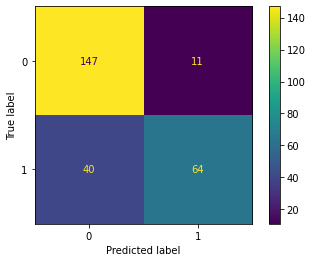

In [7]:
ConfusionMatrixDisplay.from_estimator(clf_new, x_test, y_test)
print('Confusion Matrix (Test Dataset)')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

##### 

#### <font color="red">NEURAL NETWORK STRUCTURE 2: 2 Hidden Layers with 75 Neurons and 50 Neurons, respectively</font>

In [8]:
clf2 = MLPClassifier()
params = {'solver':["adam"], 'alpha':10**-np.arange(1, 7, dtype=float), 
          'hidden_layer_sizes':[(75, 50)], 
          'activation':["logistic"], 'max_iter':[500], 'random_state':[1]}
grid2 = GridSearchCV(clf2, params, scoring='accuracy')
grid2.fit(x_train, y_train.values.reshape(-1))
print(f"Best parameter {grid2.best_params_}")

Best parameter {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (75, 50), 'max_iter': 500, 'random_state': 1, 'solver': 'adam'}


In [9]:
clf_new2 = MLPClassifier(**grid2.best_params_)
clf_new2.fit(x_train, y_train.values.reshape(-1))
y_pred2 = clf_new2.predict(x_test)
print(f"Output activation function: {clf_new2.out_activation_}")  # output activation function
print("Overall Accuracy:", accuracy_score(y_test, y_pred2))


Output activation function: logistic
Overall Accuracy: 0.8091603053435115


Confusion Matrix 2 (Test Dataset)


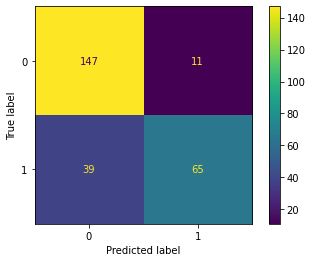

In [10]:
ConfusionMatrixDisplay.from_estimator(clf_new2, x_test, y_test)
print('Confusion Matrix 2 (Test Dataset)')
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()

## 

### Step 3: Check the performance of the model with out-of- sample accuracy

In [14]:
surv_acc = round((tp/(tp+fn))*100, 2)
fatal_acc = round((tn/(tn+fp))*100, 2)
print(f"\nFor Neural Network Structure 1: ")
print(f"\n\tPercentage of survivors correctly predicted: {surv_acc}%")
print(f"\tPercentage of fatalities correctly predicted: {fatal_acc}%")


For Neural Network Structure 1: 

	Percentage of survivors correctly predicted: 61.54%
	Percentage of fatalities correctly predicted: 93.04%


In [15]:
surv_acc2 = round((tp2/(tp2+fn2))*100, 2)
fatal_acc2 = round((tn2/(tn2+fp2))*100, 2)
print(f"\nFor Neural Network Structure 2: ")
print(f"\n\tPercentage of survivors correctly predicted: {surv_acc2}%")
print(f"\tPercentage of fatalities correctly predicted: {fatal_acc2}%")


For Neural Network Structure 2: 

	Percentage of survivors correctly predicted: 62.5%
	Percentage of fatalities correctly predicted: 93.04%


## 

### Step 4: Compare the out-of-sample accuracy (as defined in step 3) with the random forest obtained in homework #3. (You can either use a table or plot the results of the two algorithms in one figure). Explain any difference in accuracy.

In [13]:
data_compare = {
    'Classifier Type':["Random Forest", "Neural Network 1", "Neural Network 2"],
    'Survivors Correctly Predicted':["64.76%", f"{surv_acc}%", f"{surv_acc2}%"],
    'Fatalitites Correctly Predicted':["87.26%", f"{fatal_acc}%", f"{fatal_acc2}%"],
    'Accuracy Score (Overall)':["78.24%", f"{round(accuracy_score(y_test, y_pred)*100, 2)}%",
                                f"{round(accuracy_score(y_test, y_pred2)*100, 2)}%"]
}

df2 = pd.DataFrame(data=data_compare)
pd.set_option('expand_frame_repr', False)

display(df2.style.set_properties(**{'text-align': 'center'}))

,Classifier Type,Survivors Correctly Predicted,Fatalitites Correctly Predicted,Accuracy Score (Overall)
0,Random Forest,64.76%,87.26%,78.24%
1,Neural Network 1,61.54%,93.04%,80.53%
2,Neural Network 2,62.5%,93.04%,80.92%


#### 

#### Discussion:

In terms of individual accuracies, while the Random Forest is the least accurate among the 3 classifiers in terms of survival prediction,  it is the most accurate for the fatality prediction. However, the variance between the accuracies of the neural networks and the random forest is not so significant as shown by the overall accuracy score (last column of the table). That said, for the given set of data, the outcome of the three classifiers are relatively on the equal range. 

This behavior can be attributed to the fact that there are only four attributes being used to classify the data namely, "pclass","sex", "age", and "sibsp." This means that with only these four attributes, a random forest's ability to comprehend the pattern is very much at its peak. Hence, its performance is relatively equal to that of a neural network because the input data is not complex enough to showcase the latter's ability to grasp more complex patterns and to outperform the former. 

The ability or accuracy of a neural network can then be said to be data complexity-dependent. Therefore, for the given set of data, it can be concluded that a Random Forest would suffice, and a deep learning network is an overkill given that they yield relatively similar results. 